In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

[Text(0, 0, 'child_mort'),
 Text(0, 0, 'exports'),
 Text(0, 0, 'health'),
 Text(0, 0, 'imports'),
 Text(0, 0, 'income'),
 Text(0, 0, 'inflation'),
 Text(0, 0, 'life_expec'),
 Text(0, 0, 'total_fer'),
 Text(0, 0, 'gdpp')]

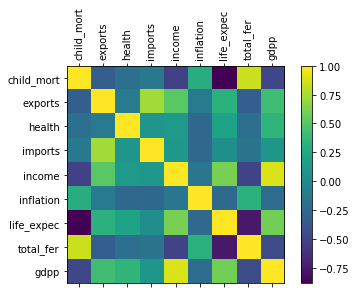

In [5]:
country = data.country
data2 = data.drop('country', axis=1)
col = data2.columns

fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (20,10)
cax = ax.matshow(data2.corr())
fig.colorbar(cax)
ax.set_xticks(np.arange(len(col)))
ax.set_xticklabels(col, rotation=90)
ax.set_yticks(np.arange(len(col)))
ax.set_yticklabels(col)

In [ ]:
plt.scatter(data2.child_mort, data2.life_expec)
data[['child_mort', 'life_expec']].corr()

In [ ]:
plt.scatter(data.income, data.gdpp)
data[['income', 'gdpp']].corr()

In [ ]:
data2.drop('income', axis=1, inplace=True)
data2.drop('life_expec', axis=1, inplace=True)

[Text(0, 0, 'child_mort'),
 Text(0, 0, 'exports'),
 Text(0, 0, 'health'),
 Text(0, 0, 'imports'),
 Text(0, 0, 'income'),
 Text(0, 0, 'inflation'),
 Text(0, 0, 'life_expec'),
 Text(0, 0, 'total_fer'),
 Text(0, 0, 'gdpp')]

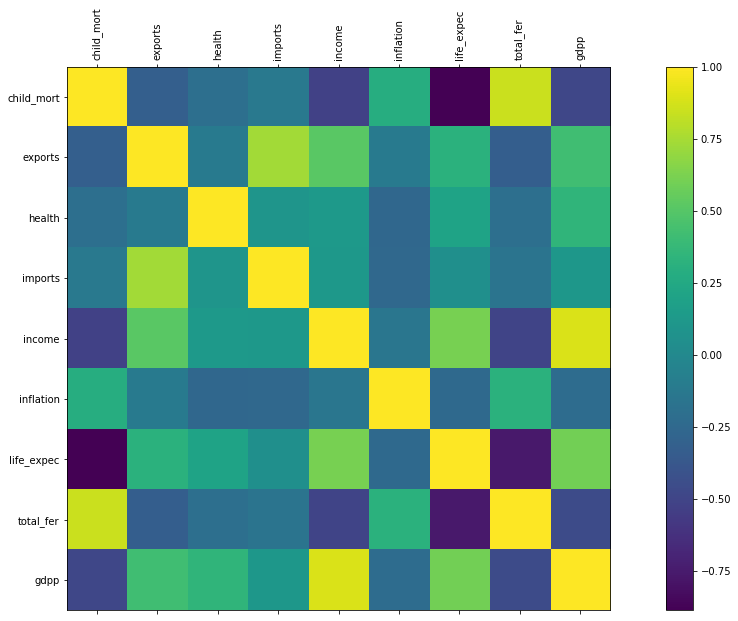

In [6]:
col = data2.columns

fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (20,10)
cax = ax.matshow(data2.corr())
fig.colorbar(cax)
ax.set_xticks(np.arange(len(col)))
ax.set_xticklabels(col, rotation=90)
ax.set_yticks(np.arange(len(col)))
ax.set_yticklabels(col)

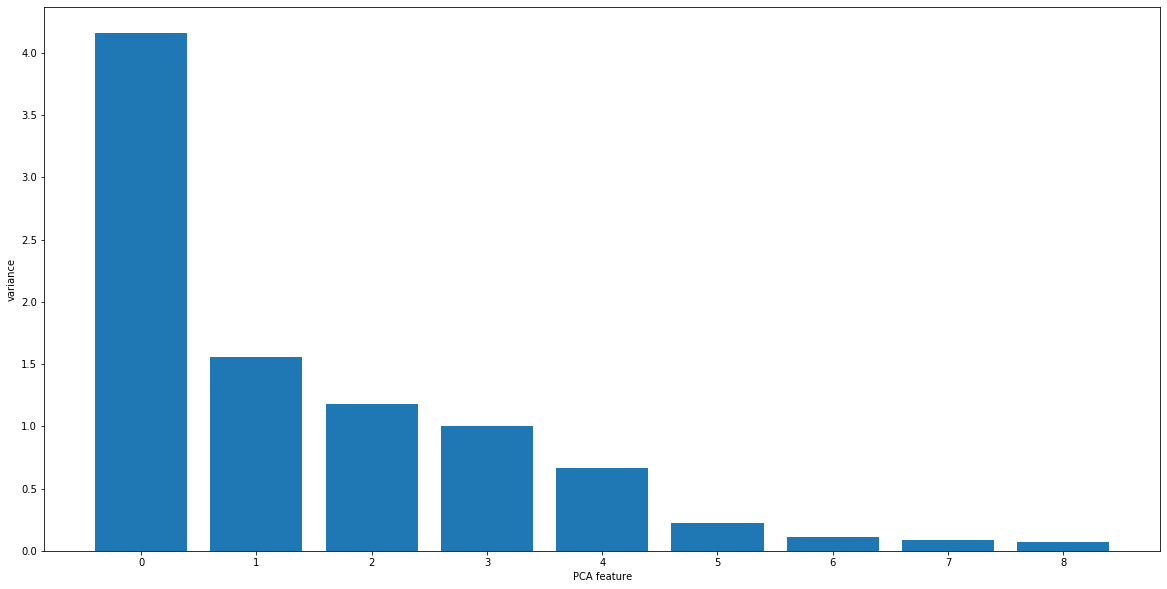

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
data_scaled=sc.fit_transform(data2)

pca = PCA()
pca.fit(data_scaled)

plt.bar(np.arange(len(col)), pca.explained_variance_)
plt.xticks(np.arange(len(col)))
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

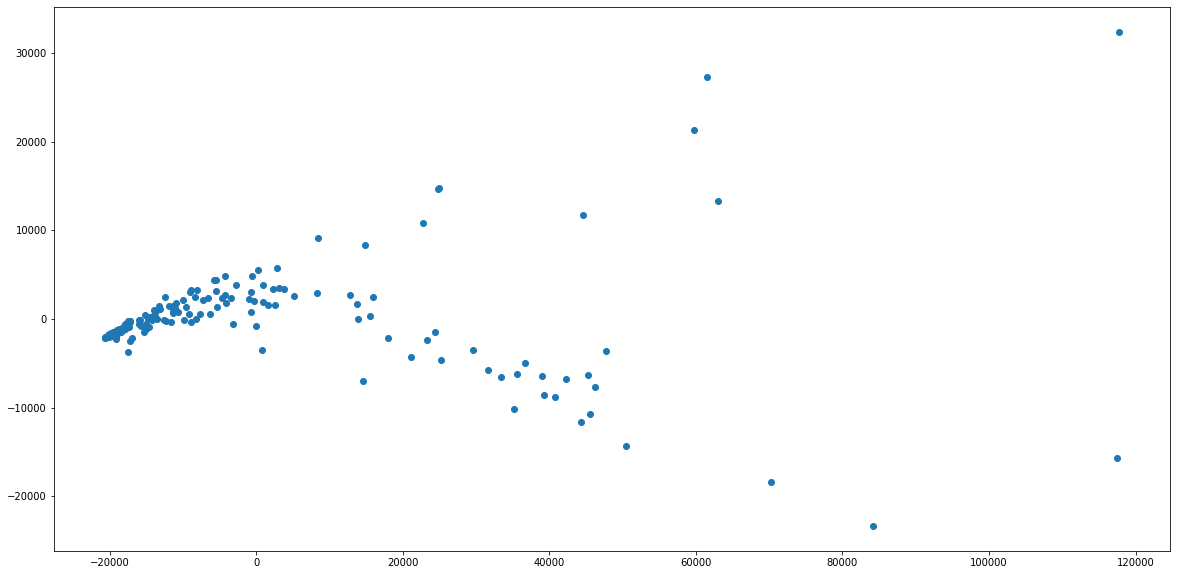

In [8]:
pca = PCA(n_components=2)
pca.fit(data2)
transformed = pca.transform(data2)

xs =  transformed[:,0]
ys =  transformed[:,1]

plt.scatter(xs, ys)
plt.show()

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.vq import whiten

scaled_features = whiten(data2)
mergings = linkage(scaled_features, method = 'ward')

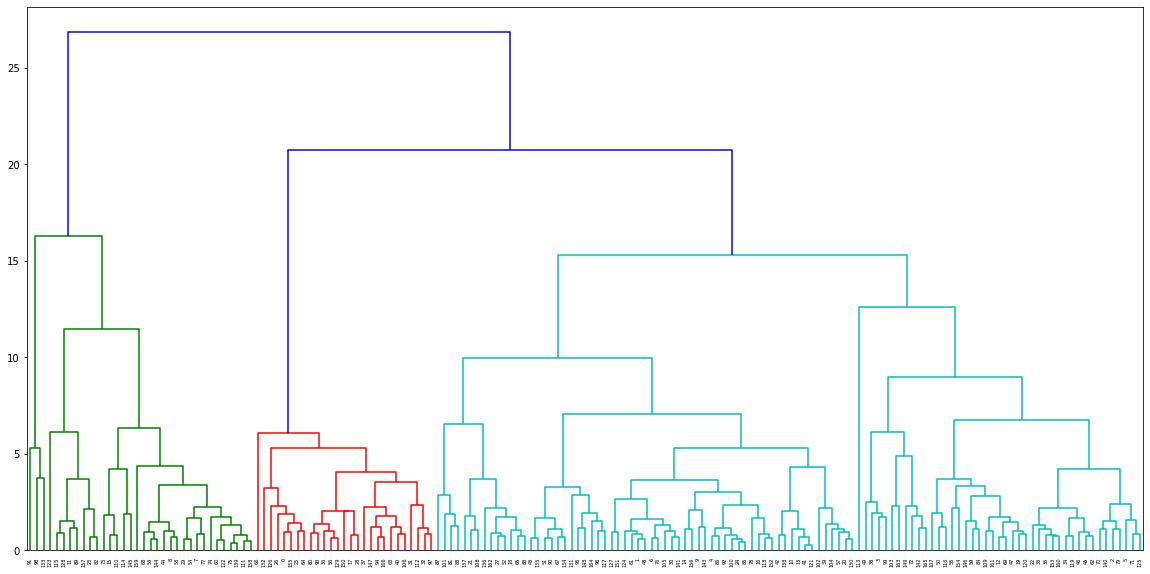

In [10]:
dendrogram(mergings)
plt.show()

In [27]:
labels = fcluster(mergings, 17 , criterion='distance')
np.unique(labels)

array([1, 2, 3], dtype=int32)

In [37]:
HR = pd.read_csv('Hierchical_Results.csv')

pd.crosstab(labels, HR.Hier_Clusters)

Hier_Clusters,0,1,2
row_0,,,
1,34,0,0
2,0,0,27
3,0,106,0


In [28]:
pairs = pd.DataFrame({'Country': country, 'Label': labels})
n = len(np.unique(pairs.Label))
pairs.head()

,Country,Label
0,Afghanistan,2
1,Albania,3
2,Algeria,3
3,Angola,3
4,Antigua and Barbuda,3


In [40]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=n)
km.fit(scaled_features)
label_km = km.predict(scaled_features)
pairs['Label_km'] = label_km

KM = pd.read_csv('KMeans_results.csv')

pd.crosstab(label_km, KM.KM_Clusters)

KM_Clusters,0,1,2
row_0,,,
0,0,47,0
1,84,0,0
2,0,0,36


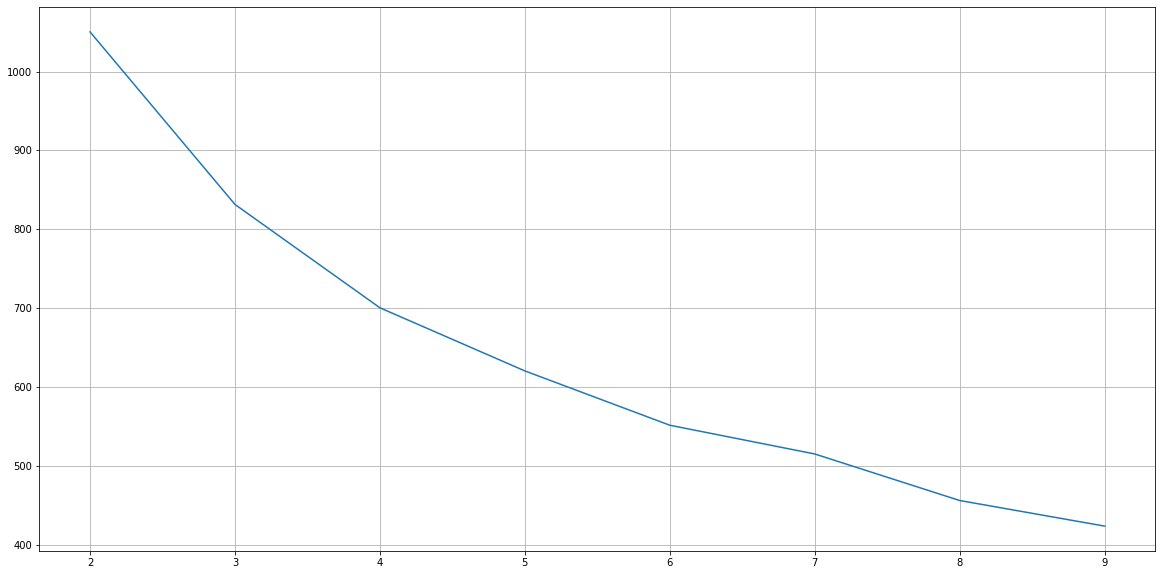

In [50]:
inertia = []
for i in np.arange(2,10):
    km = KMeans(n_clusters=i)
    km.fit(scaled_features)
    inertia = np.append(inertia, km.inertia_)

plt.plot(np.arange(2,10), inertia)
plt.grid()
    

In [46]:
inertia

[1050.2145582853304,
 831.4244352086874,
 700.5205369722204,
 631.856378842423,
 551.8879363062383,
 502.92649514240355,
 459.2479111096858,
 422.7610479412565]

Text(0.5, 0, 'HEALTH')

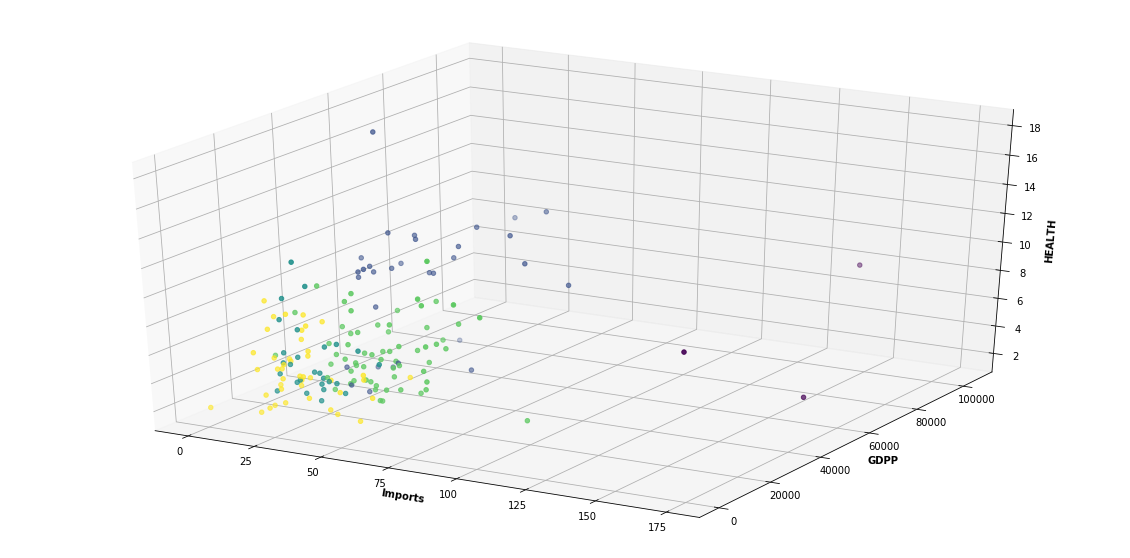

In [14]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ys = data2.gdpp
xs = data2.imports
zs = data2.health

ax.scatter3D(xs, ys, zs, c=labels)
ax.set_xlabel('Imports', fontweight ='bold') 
ax.set_ylabel('GDPP', fontweight ='bold') 
ax.set_zlabel('HEALTH', fontweight ='bold')

Text(0.5, 0, 'GDPP')

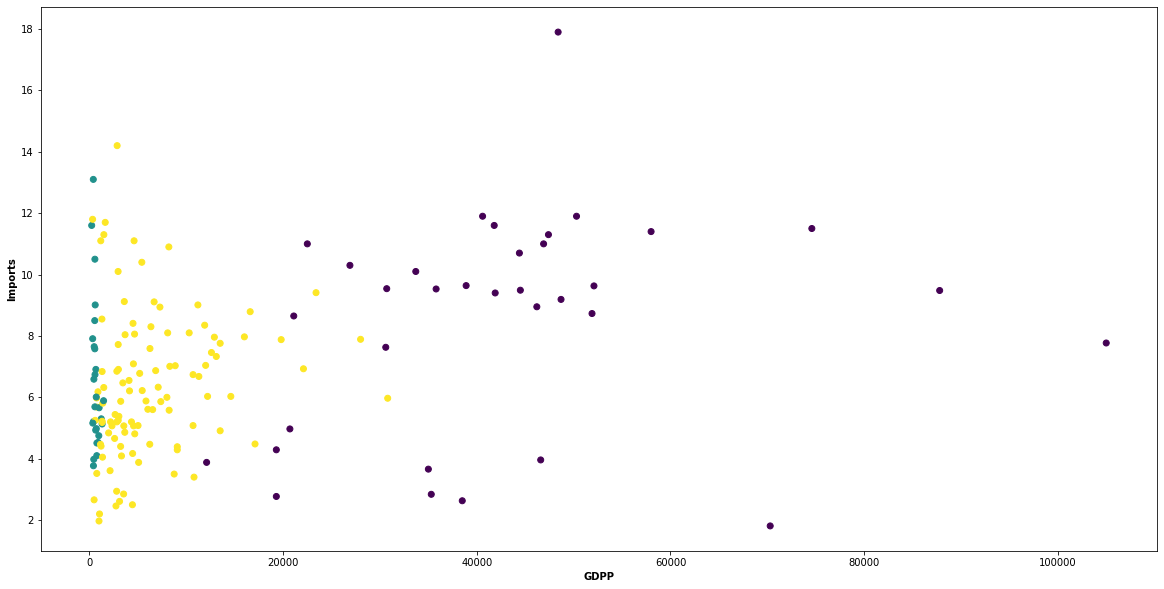

In [30]:
fig = plt.figure()
ax = plt.axes()
xs = data2.gdpp
ys = data2.health

ax.scatter(xs, ys, c=labels)
ax.set_ylabel('Imports', fontweight ='bold') 
ax.set_xlabel('GDPP', fontweight ='bold') 


In [31]:
col


Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Text(0.5, 0, 'GDPP')

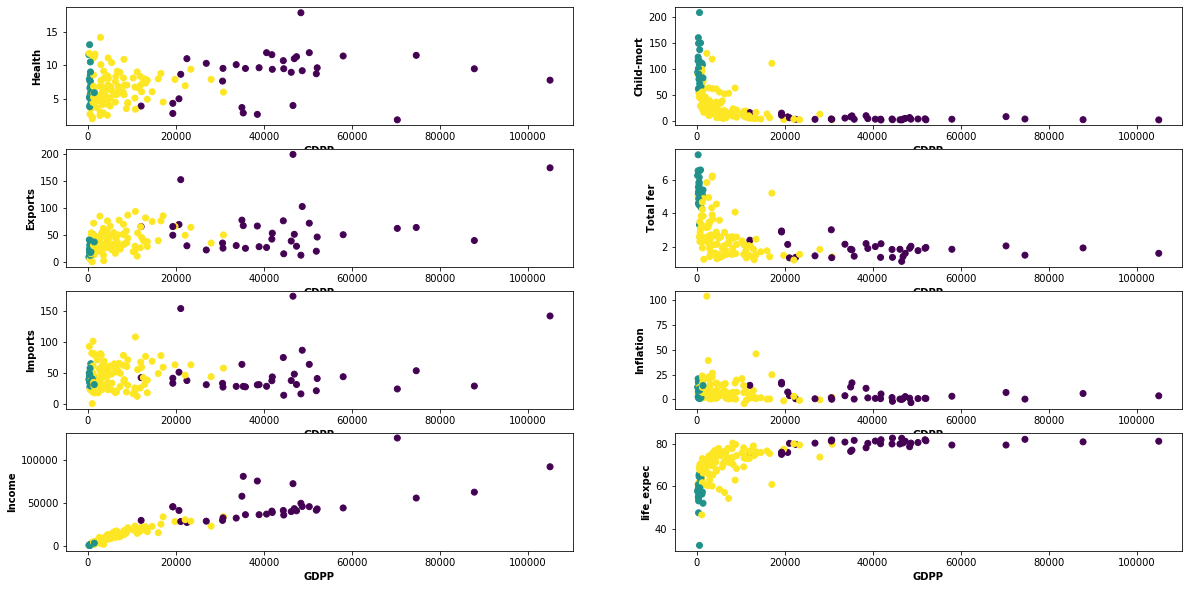

In [32]:
f, axs = plt.subplots(4, 2)
xs = data2.gdpp
ys1 = data2.health
ys2 = data2.child_mort
ys3 = data2.exports
ys4 = data2.total_fer
ys5 = data2.imports
ys6 = data2.inflation
ys7 = data2.income
ys8 = data2.life_expec


axs[0,0].scatter(xs, ys1, c=labels)
axs[0,0].set_ylabel('Health', fontweight ='bold') 
axs[0,0].set_xlabel('GDPP', fontweight ='bold') 

axs[0,1].scatter(xs, ys2, c=labels)
axs[0,1].set_ylabel('Child-mort', fontweight ='bold') 
axs[0,1].set_xlabel('GDPP', fontweight ='bold') 

axs[1,0].scatter(xs, ys3, c=labels)
axs[1,0].set_ylabel('Exports', fontweight ='bold') 
axs[1,0].set_xlabel('GDPP', fontweight ='bold') 

axs[1,1].scatter(xs, ys4, c=labels)
axs[1,1].set_ylabel('Total fer', fontweight ='bold') 
axs[1,1].set_xlabel('GDPP', fontweight ='bold')

axs[2,0].scatter(xs, ys5, c=labels)
axs[2,0].set_ylabel('Imports', fontweight ='bold') 
axs[2,0].set_xlabel('GDPP', fontweight ='bold')

axs[2,1].scatter(xs, ys6, c=labels)
axs[2,1].set_ylabel('Inflation', fontweight ='bold') 
axs[2,1].set_xlabel('GDPP', fontweight ='bold')

axs[3,0].scatter(xs, ys7, c=labels)
axs[3,0].set_ylabel('Income', fontweight ='bold') 
axs[3,0].set_xlabel('GDPP', fontweight ='bold')

axs[3,1].scatter(xs, ys8, c=labels)
axs[3,1].set_ylabel('life_expec', fontweight ='bold') 
axs[3,1].set_xlabel('GDPP', fontweight ='bold')



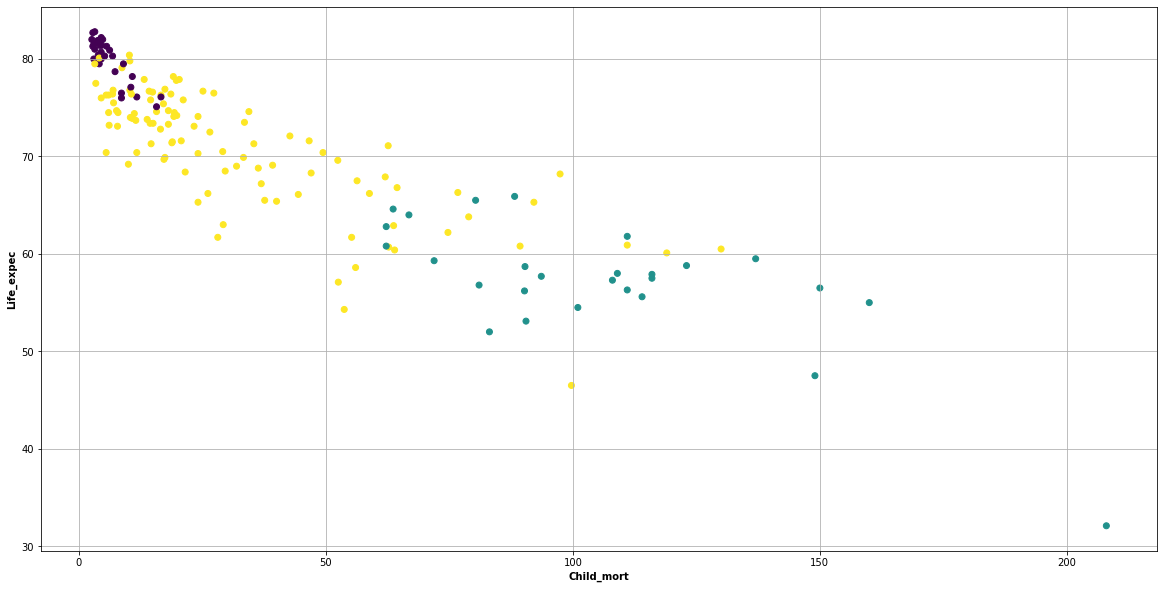

In [33]:
fig = plt.figure()
ax = plt.axes()
xs = data2.child_mort
ys = data2.life_expec

ax.scatter(xs, ys, c=labels)
ax.set_ylabel('Life_expec', fontweight ='bold') 
ax.set_xlabel('Child_mort', fontweight ='bold')
plt.grid()


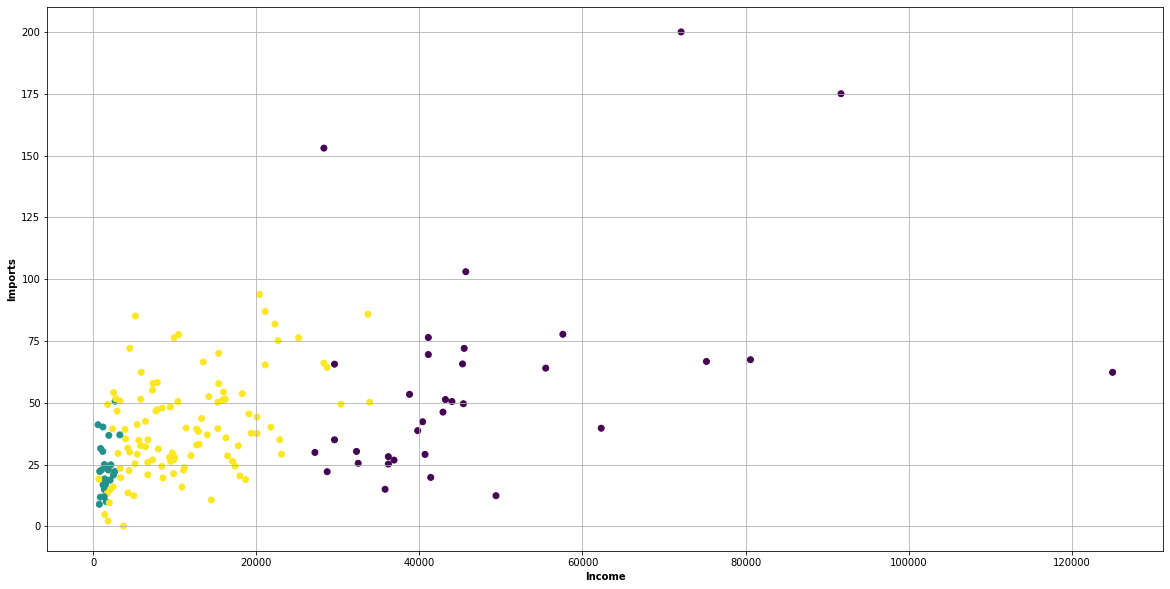

In [35]:
fig = plt.figure()
ax = plt.axes()
xs = data2.income
ys = data2.exports

ax.scatter(xs, ys, c=labels)
ax.set_ylabel('Imports', fontweight ='bold') 
ax.set_xlabel('Income', fontweight ='bold')
plt.grid()